In [4]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import norm
from astropy.table import QTable, Table, Column
from astropy import units as u
import numpy as np

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (10, 5)

In [ ]:
# The normal distribution is a bell-shaped curve that is common in statistics. The normal distribution has
# two defining values associated with it: the mean and standard deviation. The mean determines where the 
# center of the 'bell' is located and the standard deviation determines how spread out the 'bell' is from
# its mean. A standard normal distribution is a normal distribution with mean = 0 and standard deviation = 1.

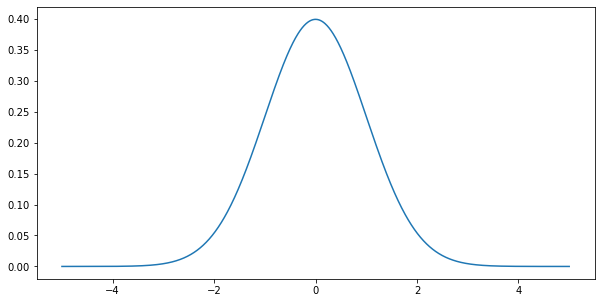

In [58]:
mu = 0                                     #mu is the mean of the distribution
sd = 1                                     #sd here is the standard deviation
x = np.linspace(-5.0, 5.0, 1000)
plt.plot(x, stats.norm.pdf(x, mu, sd))  # plotting the standard normal distribution
plt.show()

In [59]:
y = scipy.special.erfc(1.6)   # using a random number 1.6 for x and integrating the Gaussian from x = 1.6 
                              # to infinity
print('Probability = ')       # I do not understand how to convert this probability to a sigma value
                              # so I can compare it to a z table 
print(y)                      

Probability = 
0.023651616655355978


In [56]:
y = scipy.stats.norm.ppf(0.91)    # choosing a random probability 0.91 and converting to a z score gives
print('Sigma = ')                 # me 1.341, which is not the value that corresponds to that probability
print(y)                          # in the z table

Sigma = 
1.3407550336902165


In [46]:
# The lognormal distribution is a probability distribution where the logarithm of a variable is normally
# distributed. This means if X is lognormally distributed, then Y = ln(X) is normally distributed. 


ValueError: x and y must have same first dimension, but have shapes (1000,) and (1,)

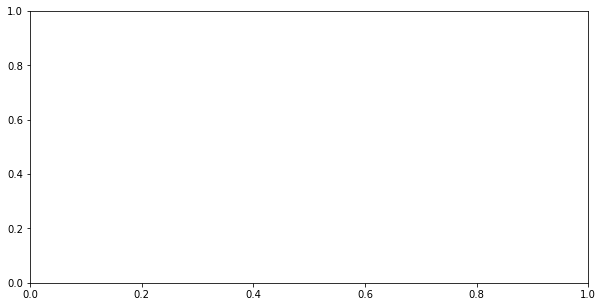

In [57]:
# s = np.random.lognormal(0.0, 1.0, 1000)         # having a very hard time figuring out how to plot this
plt.plot(x, stats.lognorm.ppf(1000, 0.0, 1.0))
show.show()